<a href="https://colab.research.google.com/github/Atikahdr/PortfolioProjects/blob/main/FINPRO_Atikah_Dr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## `Pastikan klik 'File > Save a copy in Drive' sebelum memulai pengerjaan`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

Data yang digunakan adalah data yang berasal dari Tokopedia (***bukan data sesungguhnya***). Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [ ]:
#Sumber data yang digunakan
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [ ]:
#Mengampilkan 5 baris pertama
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [ ]:
#Mengampilkan 5 baris pertama
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [ ]:
#Mengampilkan 5 baris pertama
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [ ]:
#Mengampilkan 5 baris pertama
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [ ]:
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [ ]:
#Query SQL untuk menggabungkan data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [ ]:
#Mengampilkan 5 baris pertama
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [ ]:
#Menampikan tipe data tiap kolom
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,float64
discount_amount,float64
after_discount,float64
is_gross,int64


In [ ]:
#Mengubah tipe data agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


In [ ]:
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


,0
id,object
customer_id,object
order_date,datetime64[ns]
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


## `No 1`
**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data dengan Category = Mobiles & Tablets
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name
5. Gunakan sort_values untuk mengurutkan data
6. Gunakan head untuk menampilkan top 5 produk


```



</details>

## `Jawaban No 1`

In [ ]:
# melakukan fillter data
df_fill = df[(df['is_valid']  == 1) &
             (df['category'] == 'Mobiles & Tablets') &
             (df['order_date'].dt.year == 2022)]

# melakukan group data berdasarkan sku_name
df_group = df_fill.groupby('sku_name')['qty_ordered'].sum().reset_index()

# melakukan sort_values
df_sort = df_group.sort_values(
          by='qty_ordered',
          ascending=False)
top_5 = df_sort

top_5.head(5) # menampilkan 5 data teratas

,sku_name,qty_ordered
1,IDROID_BALRX7-Gold,1000
2,IDROID_BALRX7-Jet black,31
3,Infinix Hot 4-Gold,15
43,samsung_Grand Prime Plus-Black,11
34,infinix_Zero 4-Grey,10


## `No 2`
**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data pada transaksi selama 2021
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name masing-masing tahun
5. Menggabungkan kedua data dengan merge
6. Lakukan pengurangan kolom qty 2022 dengan qty 2021


```



</details>

## `Jawaban No 2.1`

In [ ]:
# melakukan fillter data: valiid=0, category=other, tahun:2021 & 2022
df_fill = df[(df['is_valid']  == 1) &
             (df['order_date'].dt.year.isin([2021, 2022]))] # mengambil tahun 2021 & 2022

# melakukan group data berdasarkan sku_name
df_group = df_fill.groupby([df_fill['order_date'].dt.year, 'category']).agg({'qty_ordered':'sum'}).reset_index()
df_group = df_group.pivot(index='category', columns='order_date', values='qty_ordered').reset_index() #pivot tabel
df_group = df_group.fillna(0) # mengganti NaN dengan 0
df_group = df_group.rename(columns={2021:'qty_2021', 2022:'qty_2022'}) # mengganti nama tahun
df_group = df_group.reset_index(drop=True) # menghapus index

#menggabungkan 2021 dgn 2022 berdasarkan category
df_meg = pd.merge(df_group[['category', 'qty_2021']],
                  df_group[['category', 'qty_2022']],
                  on='category',
                  how='left',
                  suffixes=('_2021', '_2022'))

# mencari sellisih dari 2021 ke 2022
df_meg['qty_diff'] = df_meg['qty_2022'] - df_meg['qty_2021']

#keterangan growth
df_meg['growth'] = df_meg['qty_diff'].apply(lambda x: 'increase' if x > 0 else 'decrease')

print("15 data penurunan kuantitas penjualan pada 2022 dibandingkan 2021 (kategori:'Other')\n")
#menampilkan top 15 tanpa index
print(df_meg.head(15).to_string(index=False))

15 data penurunan kuantitas penjualan pada 2022 dibandingkan 2021 (kategori:'Other')

          category  qty_2021  qty_2022  qty_diff   growth
        Appliances       124       148        24 increase
 Beauty & Grooming       168       153       -15 decrease
             Books       171       195        24 increase
         Computing       109       153        44 increase
     Entertainment        77       150        73 increase
   Health & Sports       173       200        27 increase
     Home & Living       193       250        57 increase
       Kids & Baby       170       227        57 increase
       Men Fashion       237       175       -62 decrease
 Mobiles & Tablets       107      1154      1047 increase
            Others       426       263      -163 decrease
School & Education       184       237        53 increase
           Soghaat       759       612      -147 decrease
        Superstore       327       536       209 increase
     Women Fashion       140       489      

## `Jawaban No 2.2`

In [ ]:
# Mencari selisih
df_group['qty_diff'] = df_group['qty_2022'] - df_group['qty_2021']

# Memfilter produk yang penjualannya menurun
df_desc = df_group[df_group['qty_diff'] < 0].copy()

# Menghitung persentase penurunan
df_desc.loc[:, 'qty_diff_percentage'] = (df_desc['qty_diff'] / df_desc['qty_2021']) * 100

# Mengambil 20 produk teratas dengan penurunan terbesar
top_20 = df_desc.sort_values(by='qty_diff', ascending=False).head(20)

# Reset indeks dan menampilkan hasil
top_20 = top_20.reset_index(drop=True)

print("\nTop 20 produk yang mengalami penurunan paling tinggi :")
print(top_20.to_string(index=False))


Top 20 produk yang mengalami penurunan paling tinggi :
         category  qty_2021  qty_2022  qty_diff  qty_diff_percentage
Beauty & Grooming       168       153       -15            -8.928571
      Men Fashion       237       175       -62           -26.160338
          Soghaat       759       612      -147           -19.367589
           Others       426       263      -163           -38.262911


## `No 3`
**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan gross = 1
2. Memfilter data dengan valid = 0
3. Memfilter data dengan net = 0
4. Memfilter data pada transaksi selama 2022


```



</details>

## `Jawaban No 3`

In [ ]:
# melakukan fillter data: gross=1, valiid=0, net=0, tahun:2022
df_fill = df[(df['is_gross']  == 1) &
             (df['is_valid'] == 0) &
             (df['is_net'] == 0) &
             (df['order_date'].dt.year == 2022)] # mengambil tahun 2022

#mengambil data customer_id dan registered_date
df_crm = df_fill[['customer_id', 'registered_date']]
df_crm = df_crm.drop_duplicates(subset='customer_id')
df_crm = df_crm.reset_index(drop=True) #reset indeks

print("\nData pelanggan yang sudah melakukan check-out namun belum melakukan pembayaran :")
print(df_crm.to_string(index=False)) #menampilkan hasil


Data pelanggan yang sudah melakukan check-out namun belum melakukan pembayaran :
customer_id registered_date
   C246762L      2022-05-08
   C848774L      2021-11-07
   C693415L      2022-04-12
   C180595L      2022-04-22
   C587425L      2022-03-22
   C612225L      2022-04-24
   C315164L      2021-11-05
   C904928L      2022-05-18
   C317777L      2021-12-06
   C353808L      2022-05-09
   C257393L      2021-11-09
   C261226L      2022-05-17
   C318081L      2022-06-17
   C269751L      2022-05-04
   C314557L      2022-05-13
   C533504L      2022-05-12
   C841181L      2022-04-21
   C394285L      2022-07-07
   C338431L      2022-08-21
   C548952L      2022-06-02
   C805381L      2022-04-13
   C232406L      2021-08-01
   C432189L      2022-06-10
   C495308L      2022-07-28
   C799285L      2022-03-02
   C278051L      2022-07-18
   C535886L      2022-05-17
   C763177L      2022-07-18
   C807679L      2022-07-20
   C295434L      2022-06-07
   C676393L      2021-07-27
   C367865L      2022-

In [ ]:
#Jalankan kode ini untuk mendownload file
from google.colab import files
df_crm.to_csv('audience_list.csv', encoding = 'utf-8-sig',index=False) #ganti [nama variabel file] dengan nama variabel yang digunakan
files.download('audience_list.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## `No 4`
**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Buatlah kolom baru untuk day, month, dan month number
2. Memfilter data dengan valid = 1
3. Memfilter data dengan day termasuk 'Saturday', 'Sunday' dengan menggunakan fungsi isin dan simpan dalam variable 'weekends'
4. Memfilter data dengan day termasuk 'Monday','Tuesday','Wednesday','Thusday','Friday' dengan menggunakan fungsi isin dan simpan dengan variabel 'weekday'
5. Memfilter data pada transaksi selama 2022 bulan Oktober sampai dengan Desember
6. Gunakan groupby berdasarkan pada masing-masing variabel
7. Menggabungkan kedua data dengan merge
8. Tampilkan pada grafik batang untuk melihat perbedaananya


```



</details>

## `Jawaban No 4.1`

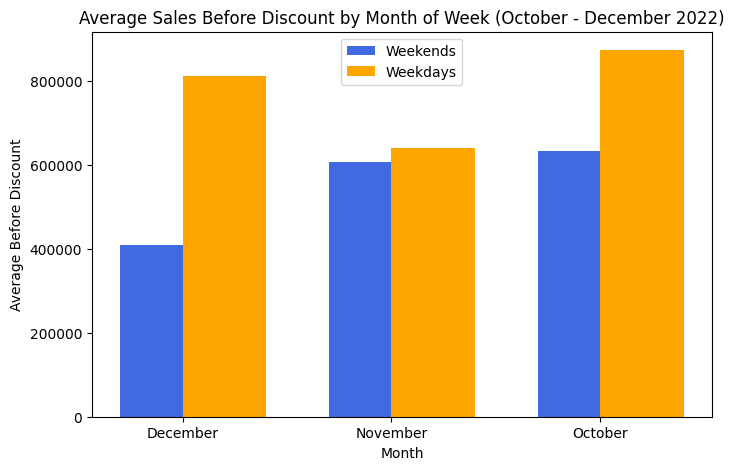


Rata-rata Penjualan per Bulan untuk Weekends:
   month  before_discount
December        410599.40
November        607794.21
 October        634260.07

Rata-rata Penjualan per Bulan untuk Weekdays:
   month  before_discount
December        813574.29
November        641862.00
 October        874690.27


In [ ]:
#membuat kolom tambahhan untuk day, month dan month number
df['day'] = df['order_date'].dt.day_name()
df['month'] = df['order_date'].dt.month_name()
df['month_number'] = df['order_date'].dt.month_name

# melakukan fillter data pada weekends
df_weekends = df[(df['is_valid']  == 1) &
                 (df['day'].isin(['Saturday', 'Sunday'])) &
                 (df['order_date'].dt.year == 2022) &
                 (df['order_date'].dt.month.isin([10, 11, 12]))]

# melakukan fillter data pada weekdays
df_weekdays = df[(df['is_valid']  == 1) &
                (df['day'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])) &
                (df['order_date'].dt.year == 2022) &
                (df['order_date'].dt.month.isin([10, 11, 12]))]

#melakukan group dan menghitung rata-rat weekdays dan weekends
weekends_avg = df_weekends.groupby(['month'])['before_discount'].mean().round(2).reset_index()
weekdays_avg = df_weekdays.groupby(['month'])['before_discount'].mean().round(2).reset_index()

#merge data weekend dan weekdays
df_mrg = pd.merge(weekends_avg,
                  weekdays_avg,
                  on=['month'],
                  how='outer',
                  suffixes=('_weekends', '_weekdays'))

# Visualisasi hasil
plt.figure(figsize=(8,5))
plt.bar(weekends_avg['month'], weekends_avg['before_discount'], width=0.6, label='Weekends', color='royalblue', align='center') #Membuat grafik batang weekends
plt.bar(weekdays_avg['month'], weekdays_avg['before_discount'], width=0.4, label='Weekdays', color='orange', align='edge')#Membuat grafik batang weekdays
plt.xlabel('Month') # Menambahkan x label
plt.ylabel('Average Before Discount') # Menambahkan y label
plt.title('Average Sales Before Discount by Month of Week (October - December 2022)') #judul
plt.legend()  # Menampilkan legenda
plt.show() # Menampilkan grafik

# Menampilkan rata-rata penjualan per bulan
print("\nRata-rata Penjualan per Bulan untuk Weekends:")
print(weekends_avg.to_string(index=False))
print("\nRata-rata Penjualan per Bulan untuk Weekdays:")
print(weekdays_avg.to_string(index=False))

## `Jawaban No 4.2`

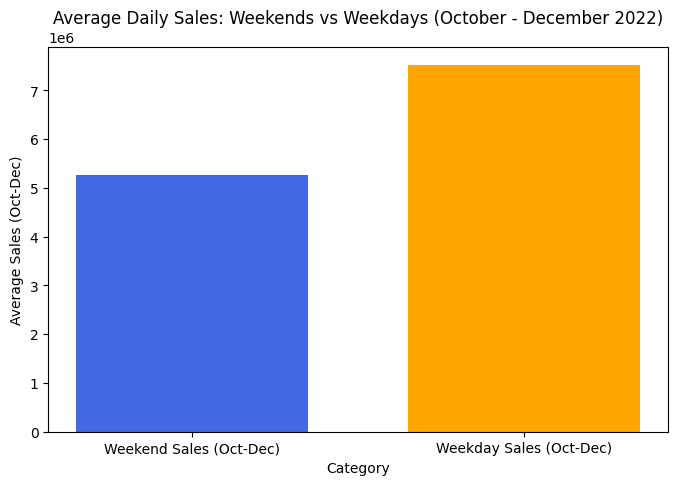


Total Rata-rata Penjualan Harian Weekends (Oktober - Desember): 5269300.0
Total Rata-rata Penjualan Harian Weekdays (Oktober - Desember): 7520249.29


In [ ]:
# Menghitung rata-rata penjualan harian untuk weekends dan weekdays selama 3 bulan
weekends_avg_total = (df_weekends['before_discount'].sum() / df_weekends['order_date'].nunique()).round(2)
weekdays_avg_total = (df_weekdays['before_discount'].sum() / df_weekdays['order_date'].nunique()).round(2)

# Menyiapkan data untuk grafik
categories = ['Weekend Sales (Oct-Dec)', 'Weekday Sales (Oct-Dec)']  # Kategori
average_sales = [weekends_avg_total, weekdays_avg_total]  # Rata-rata penjualan

# Visualisasi hasil
plt.figure(figsize=(8,5))
plt.bar(categories, average_sales, width=0.7, color=['royalblue', 'orange'])# Membuat grafik batang selama 3 bulan
plt.xlabel('Category') # Menambahkan x label
plt.ylabel('Average Sales (Oct-Dec)') # Menambahkan x label
plt.title('Average Daily Sales: Weekends vs Weekdays (October - December 2022)') #judul
plt.show() # Menampilkan grafik

# Menampilkan hasil perbandingan rata-rata penjualan harian
print(f"\nTotal Rata-rata Penjualan Harian Weekends (Oktober - Desember): {weekends_avg_total}")
print(f"Total Rata-rata Penjualan Harian Weekdays (Oktober - Desember): {weekdays_avg_total}")